In [106]:
import pandas as pd 
import numpy as np
import os 
import sys 
target_job = '4076763'

In [107]:
# First 
names = {} # index to string of names
datasets = ['ionosphere', 'mammo_graphic', 'cleveland', 'wisconsin']
models = ['GP_model', 'MOGP_model', 'NCLMOGP_model', 'PFMOGP_model']
for i,model in enumerate(models):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])


In [108]:
# First load data in 
data = {}
for fn in os.listdir(f'results_file/{target_job}/'):
    fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[0] # currently these files only have one entry
    f = f'results_file/{target_job}/{fn}/{fn2}'
    data[int(fn)] = pd.read_csv(f, index_col=False)
print(f'Number of results files in job {target_job} = {len(data)}')

Number of results files in job 4076763 = 12


In [109]:
# Quick look at the data
data[1] # 1 -> num jobs

,member_generation,training,seed,time,full_acc,majority_acc,minority_acc,tn,fp,fn,tp
0,True,True,0,7.029890e+01,0.955102,0.974522,0.920455,81,7,4,153
1,True,False,0,7.029890e+01,0.773585,0.808824,0.710526,27,11,13,55
2,False,True,0,1.430511e-06,0.955102,0.974522,0.920455,81,7,4,153
3,False,False,0,1.430511e-06,0.773585,0.808824,0.710526,27,11,13,55
4,True,True,169,1.065688e+02,0.959184,0.980892,0.920455,81,7,3,154
...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,4732,9.536743e-07,0.858491,0.882353,0.815789,31,7,8,60
116,True,True,4901,6.398472e+01,0.983673,0.993631,0.965909,85,3,1,156
117,True,False,4901,6.398472e+01,0.877358,0.970588,0.710526,27,11,2,66
118,False,True,4901,7.152557e-07,0.983673,0.993631,0.965909,85,3,1,156


In [110]:
# method to efficently grab correct subsections from 
def get_data(task_id, member_generation=False, training=False, numpy=False):
    x = data[task_id]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

<AxesSubplot:xlabel='majority_acc', ylabel='minority_acc'>

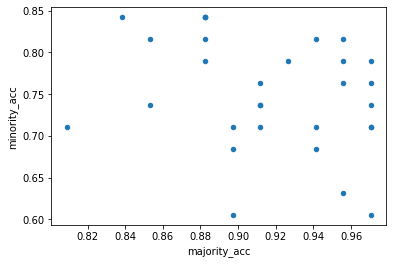

In [111]:
get_data(1).plot.scatter(x='majority_acc', y='minority_acc')

In [130]:
# Get the description for each. 
description = pd.DataFrame(data=[get_data(key)['full_acc'].describe() for key in data.keys()])
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in models:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

,count,mean,std,min,25%,50%,75%,max
ionosphere_GP_model,30.0,0.735849,0.042263,0.594340,0.716981,0.735849,0.764151,0.830189
mammo_graphic_GP_model,30.0,0.731852,0.072523,0.511111,0.691667,0.738889,0.777778,0.866667
cleveland_GP_model,30.0,0.730741,0.071097,0.533333,0.691667,0.744444,0.777778,0.833333
wisconsin_GP_model,30.0,0.741232,0.072961,0.502008,0.738956,0.767068,0.778112,0.807229
ionosphere_MOGP_model,30.0,0.856918,0.032024,0.773585,0.839623,0.858491,0.877358,0.905660
mammo_graphic_MOGP_model,30.0,0.757965,0.048731,0.574297,0.747992,0.763052,0.779116,0.827309
cleveland_MOGP_model,30.0,0.821301,0.093001,0.629268,0.757317,0.831707,0.896341,0.946341
wisconsin_MOGP_model,30.0,0.952358,0.016736,0.917073,0.941463,0.953659,0.965854,0.985366
ionosphere_NCLMOGP_model,30.0,0.795926,0.050916,0.700000,0.755556,0.788889,0.822222,0.900000
mammo_graphic_NCLMOGP_model,30.0,0.834472,0.079640,0.629268,0.791463,0.841463,0.908537,0.951220
